In [1]:
# %load eeg_resampling.py
#%%
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import scipy

import scikits.samplerate as sk_samplerate

import eeghdf
import eegvis.stacklineplot as stackplot
#%%

In [2]:
# check versions
print('scikits.samplerate (Secret Rabbit code) version:', sk_samplerate.__version__)
print('scipy:', scipy.__version__)
print('matplotlib.__version__')
#%%
plt.rcParams['figure.figsize'] = (24,9)

#%%

scikits.samplerate (Secret Rabbit code) version: 0.3.4.dev
scipy: 0.19.0
matplotlib.__version__


In [3]:
hf = eeghdf.Eeghdf('../../eeg-hdfstorage/data/absence_epilepsy.eeghdf')
print('original shape:', hf.phys_signals.shape)

eegsig = hf.phys_signals[0:30, 0:100000]
eegsigt = eegsig.transpose()
#%%

fs0 = hf.sample_frequency # usually 200
fs1 = 156
fs2 = 100
fs3 = 50

A = 0
B = 3

original shape: (36, 362200)


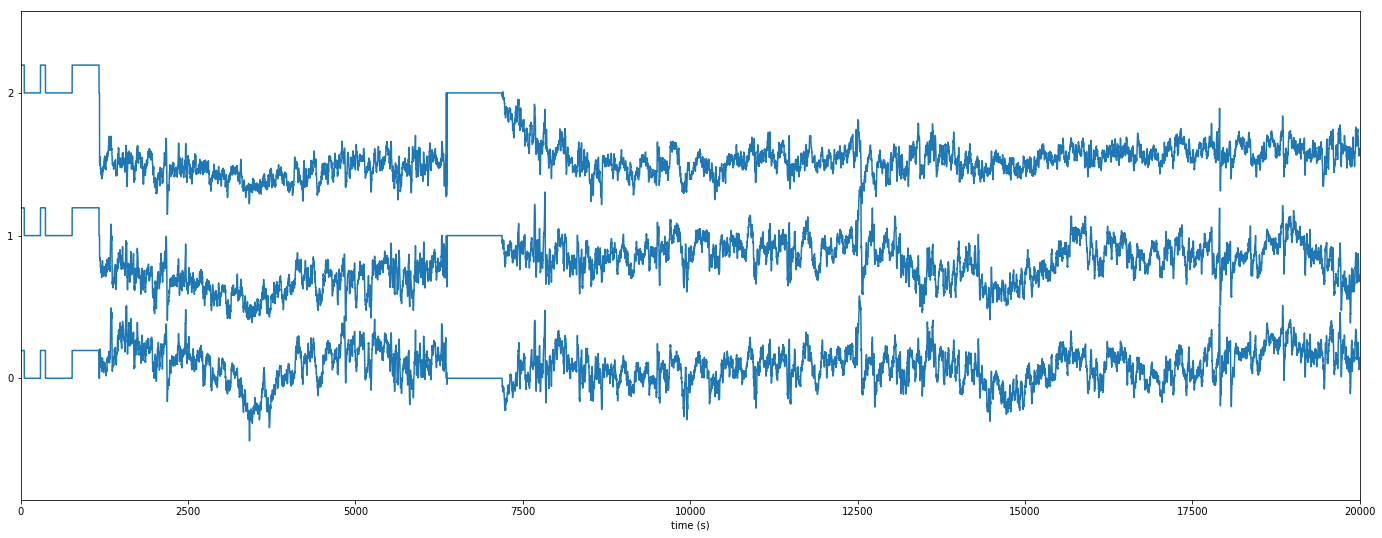

In [4]:
#%%
stackplot.stackplot_t(eegsigt[0:int(20000),A:B])

In [5]:
#%% Cell[] 
eegdownt1 = sk_samplerate.resample(eegsigt, fs1/fs0, 'sinc_best', verbose=True)
eegdownt2 = sk_samplerate.resample(eegsigt, fs2/fs0, 'sinc_best', verbose=True)

print('eegdownt1.shape:', eegdownt1.shape)

eegdownt1.shape: (77998, 30)


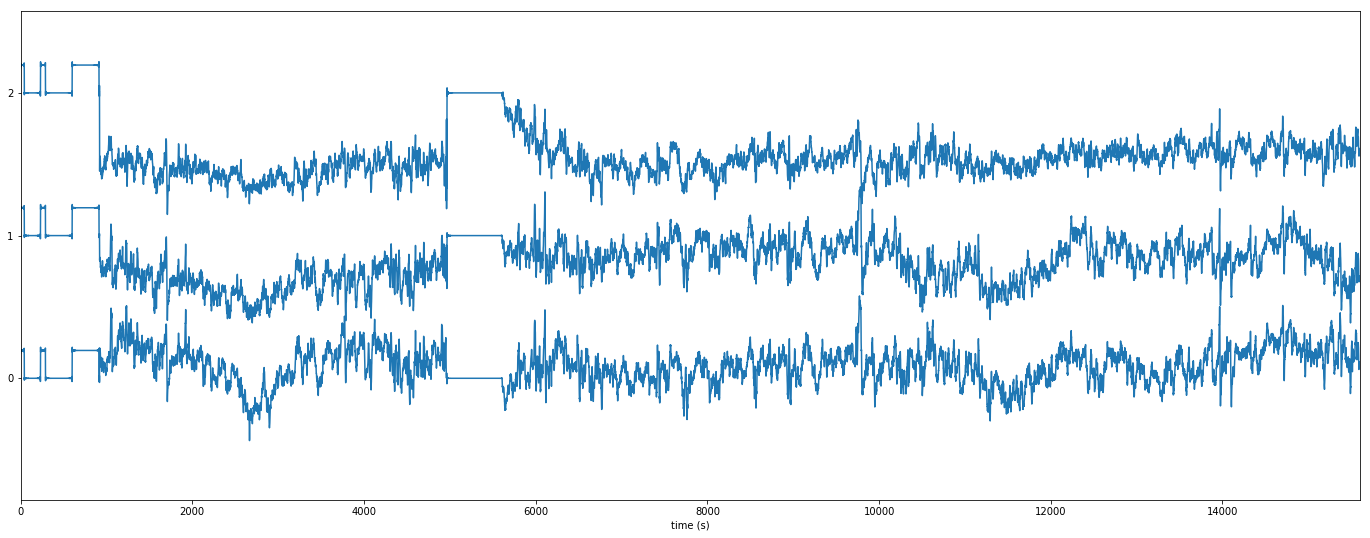

In [6]:
#%%
stackplot.stackplot_t(eegdownt1[0:int(20000*(fs1/fs0)),A:B])
#%%

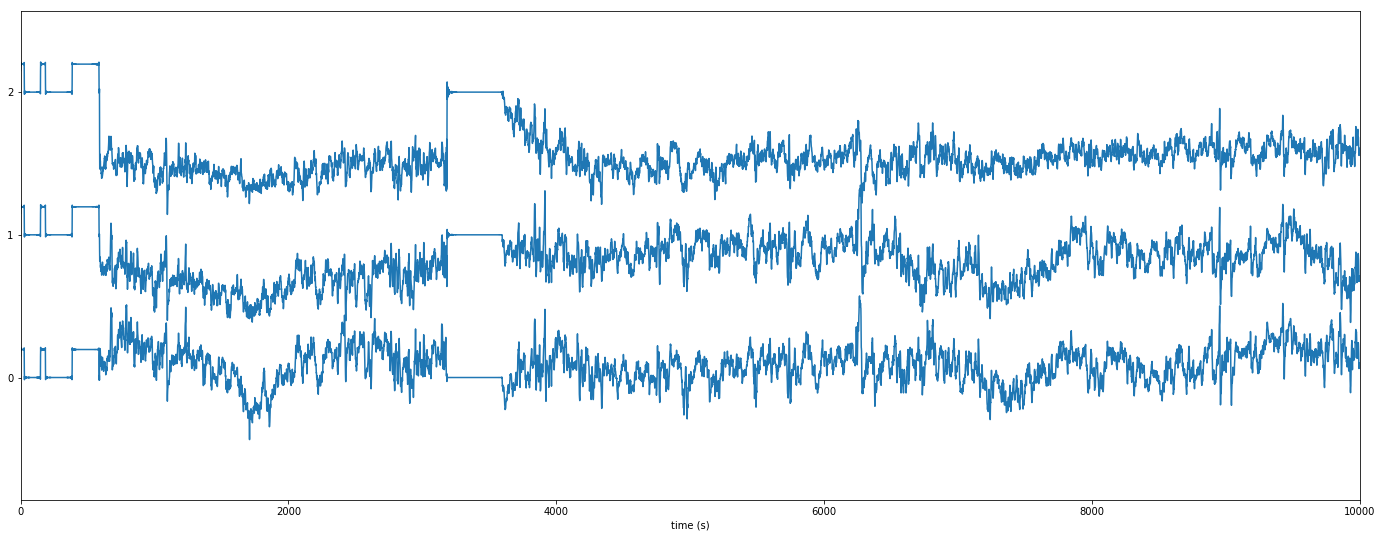

In [7]:
stackplot.stackplot_t(eegdownt2[0:int(20000*(fs2/fs0)),A:B])

ratio: 0.25


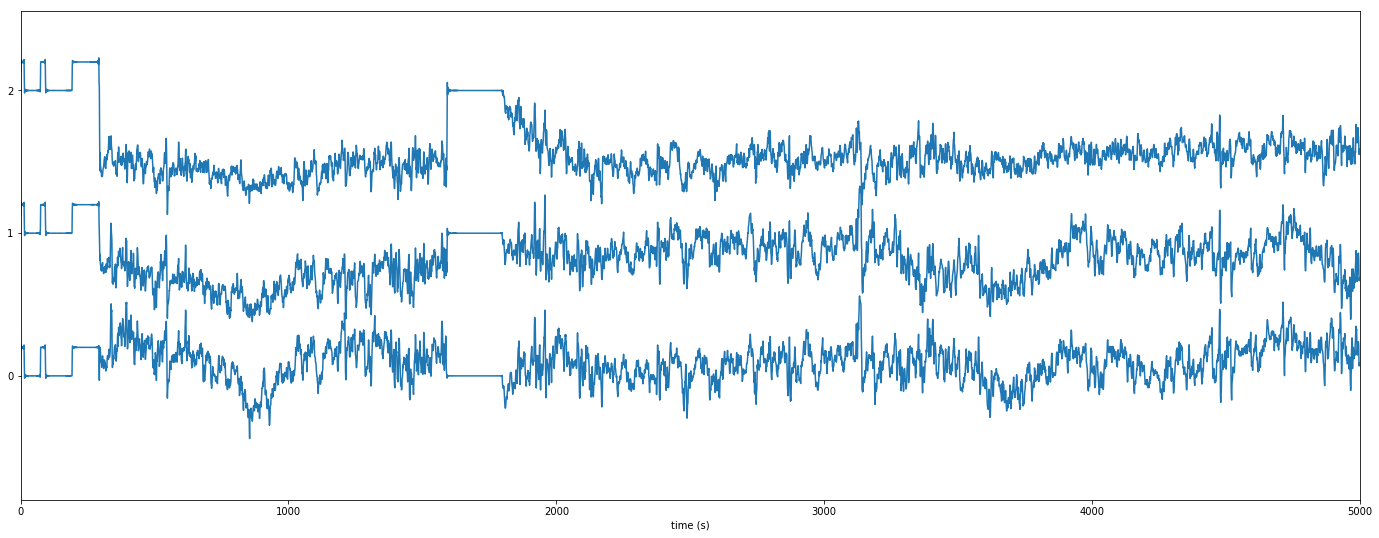

In [8]:
#%%
eegdownt3 = sk_samplerate.resample(eegsigt, fs3/fs0, 'sinc_best')
stackplot.stackplot_t(eegdownt3[0:int(20000*(fs3/fs0)),A:B])
print('ratio:', fs3/fs0)

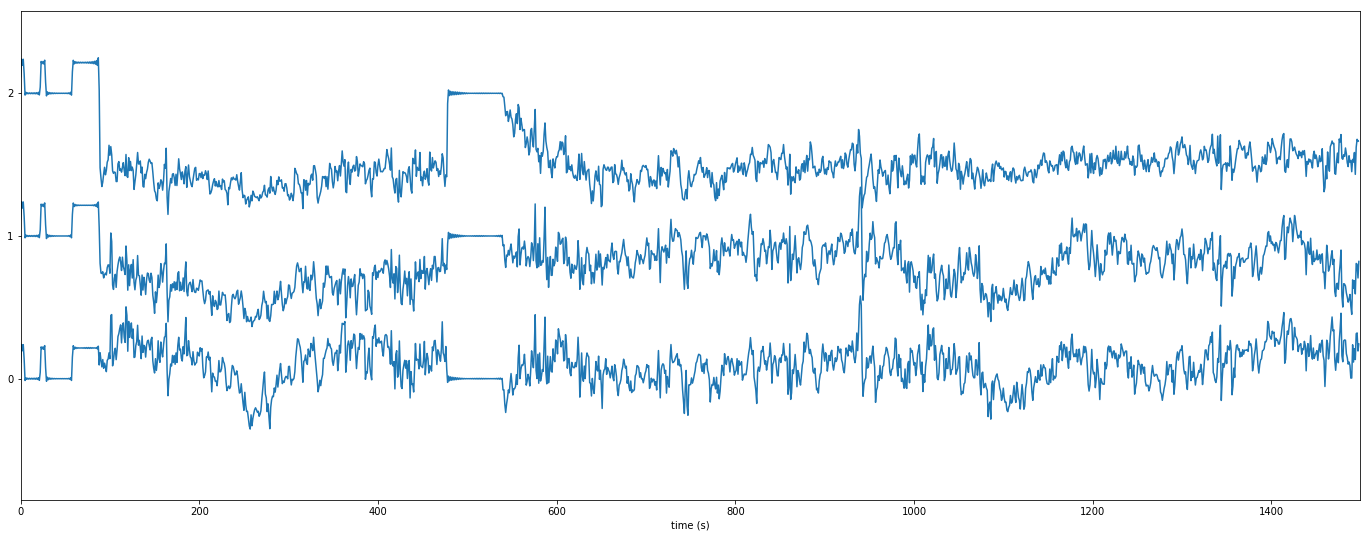

In [9]:
#%%
fs4 = 15
eegdownt4 = sk_samplerate.resample(eegsigt, fs4/fs0, 'sinc_best')
stackplot.stackplot_t(eegdownt4[0:int(20000*(fs4/fs0)),A:B])
#%%

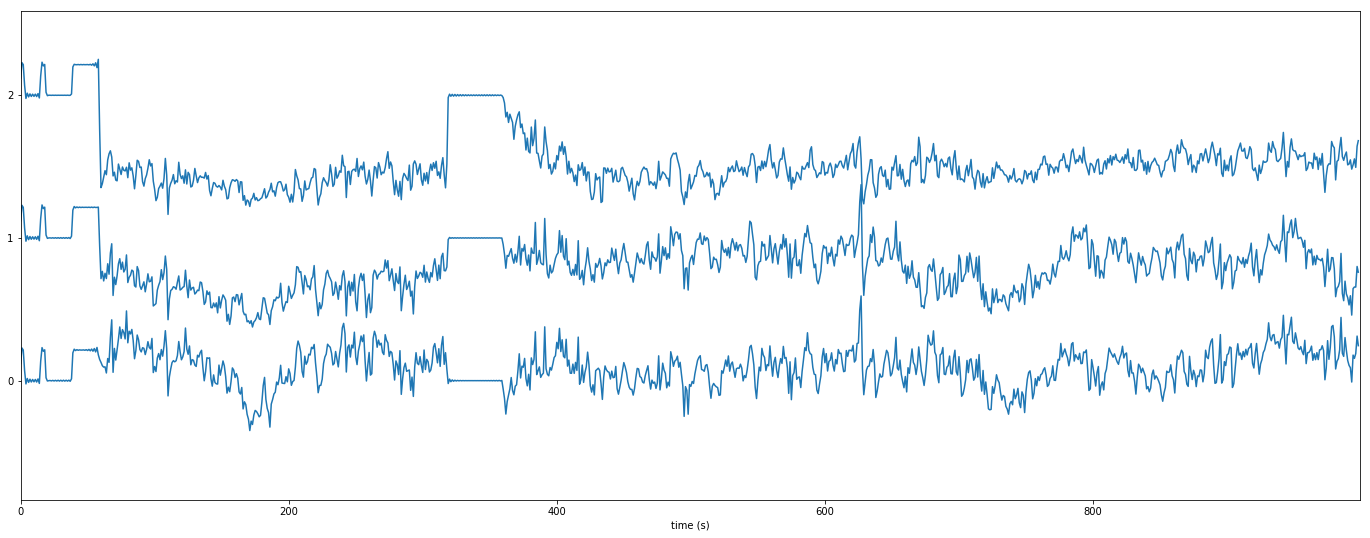

In [10]:
fs5 = 10
eegdownt5 = sk_samplerate.resample(eegsigt, fs5/fs0, 'sinc_best')
stackplot.stackplot_t(eegdownt5[0:int(20000*(fs5/fs0)),A:B])
#%%

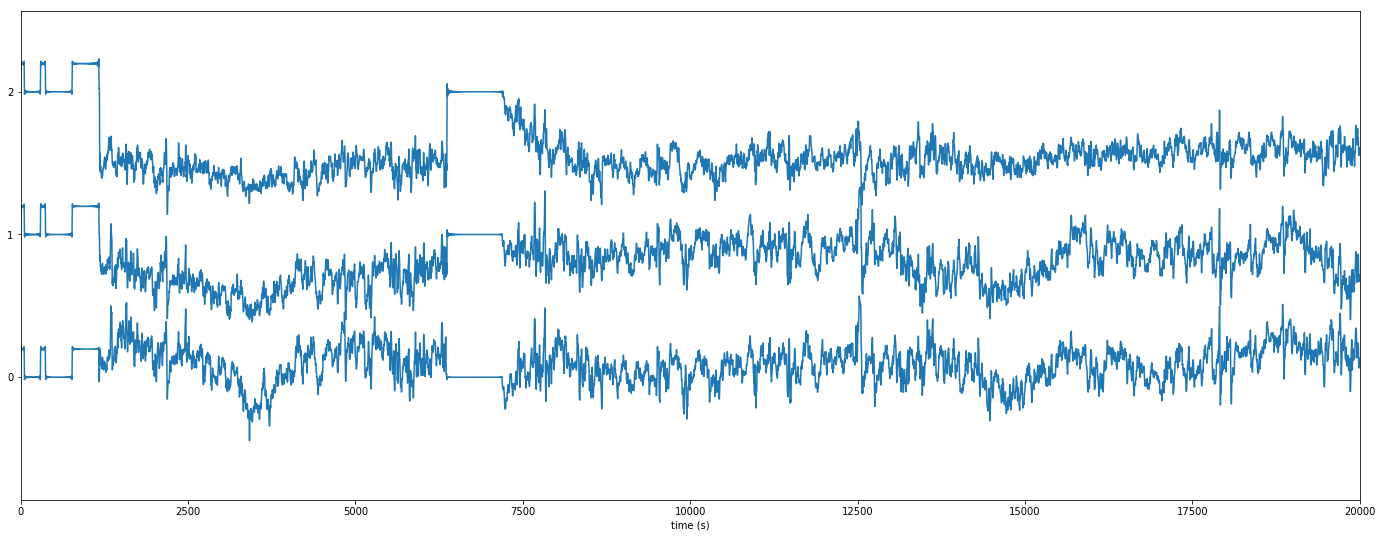

In [11]:
eegupt3 = sk_samplerate.resample(eegdownt3, fs0/fs3, 'sinc_best')

stackplot.stackplot_t(eegupt3[0:20000,A:B])

In [12]:
print('ratio:', fs0/fs3, 'down/upsample shape:', eegupt3.shape, 'original shape:', eegsigt.shape)

ratio: 4.0 down/upsample shape: (99991, 30) original shape: (100000, 30)


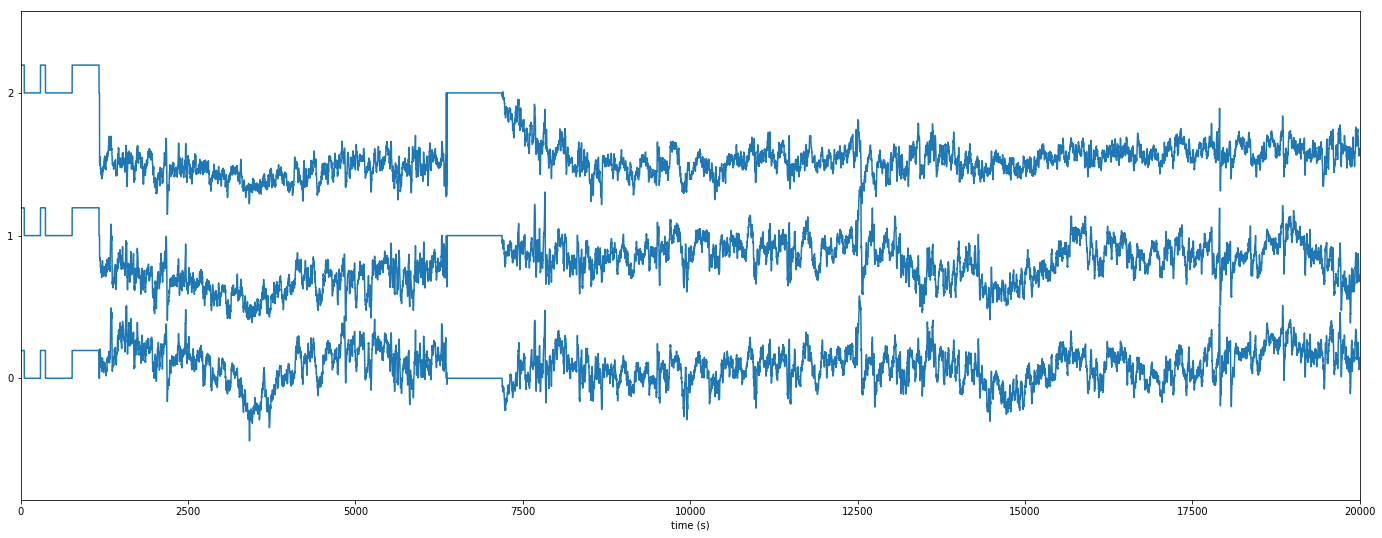

In [13]:
stackplot.stackplot_t(eegsigt[0:20000,A:B])

In [15]:
sum(eegsigt[0:20000,0])

436407.20312229719

In [16]:
sum(eegupt3[0:20000,0])

436386.101720898

In [17]:
sum(np.abs(eegupt3[0:20000,0])) - sum(np.abs(eegsigt[0:20000,0]))

-419.50621798972134

In [18]:
dd = eegsigt[0:20000,0] - eegupt3[0:20000,0]

In [19]:
V = np.var(eegsigt[0:20000,0])


In [20]:

print('Variance:', V, 'Stderr:', math.sqrt(V))

Variance: 1004.08221101 Stderr: 31.687256287248058


Text(0.5,1,'error relative to stderr of original signal')

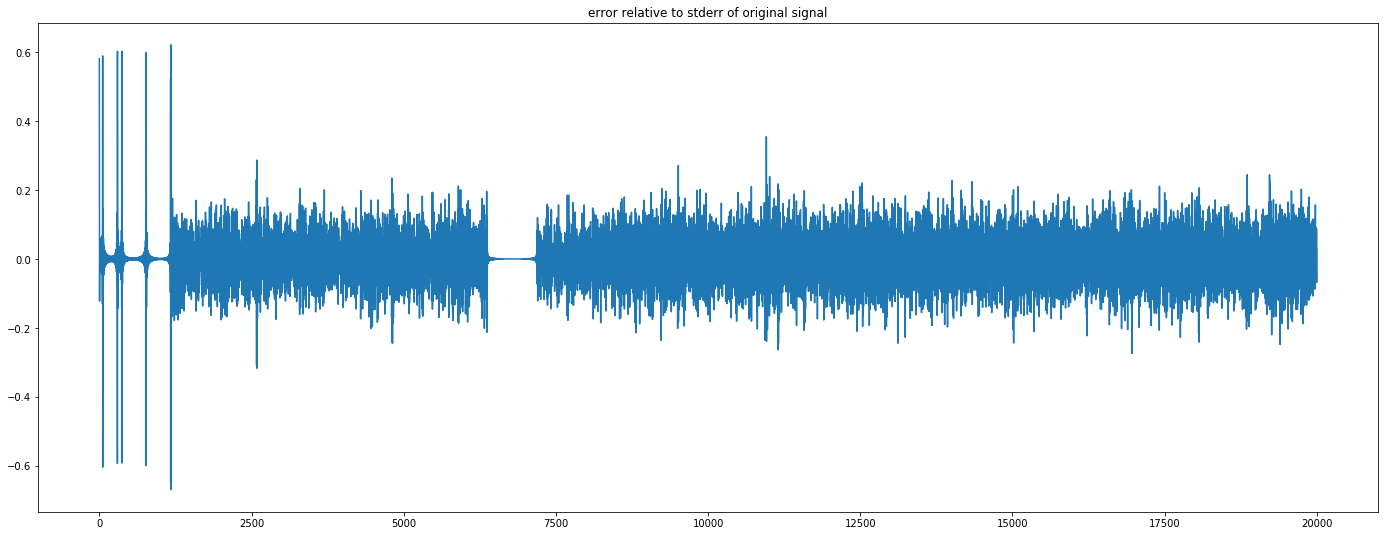

In [21]:
plt.plot(dd/math.sqrt(V))
plt.title('error relative to stderr of original signal')